Acquire and process the data

In [1]:
import pandas as pd

In [2]:
# Download the dataset
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
ecg = df.values
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
labels = ecg[:, -1]
data = ecg[:,:-1]

#print(data[:5])
print(labels[:5])

[1. 1. 1. 1. 1.]


In [4]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25, random_state=21)

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

In [6]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [7]:
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [8]:
import matplotlib.pyplot as plt
import numpy as np

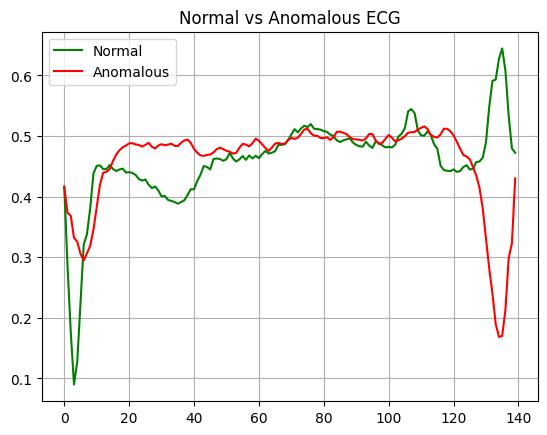

In [9]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0], color='green')
plt.plot(np.arange(140), anomalous_train_data[0], color='red')
plt.title("Normal vs Anomalous ECG")
plt.legend(["Normal", "Anomalous"])
plt.show()

Model Building

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [14]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      Dense(32, activation="relu"),
      Dense(16, activation="relu"),
      Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      Dense(16, activation="relu"),
      Dense(32, activation="relu"),
      Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [17]:
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=30,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - loss: 0.0206 - val_loss: 0.0328
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0205 - val_loss: 0.0329
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0202 - val_loss: 0.0328
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0202 - val_loss: 0.0325
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0201 - val_loss: 0.0325
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0201 - val_loss: 0.0324
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0199 - val_loss: 0.0322
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0200 - val_loss: 0.0322
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0199 - val_loss: 0.0322
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0199 - val_loss: 0.0318
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0198 - val_loss: 0.0314
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0197 - val_loss: 0.0313

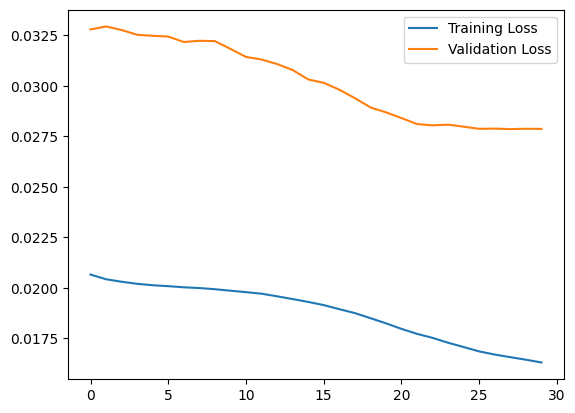

In [18]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

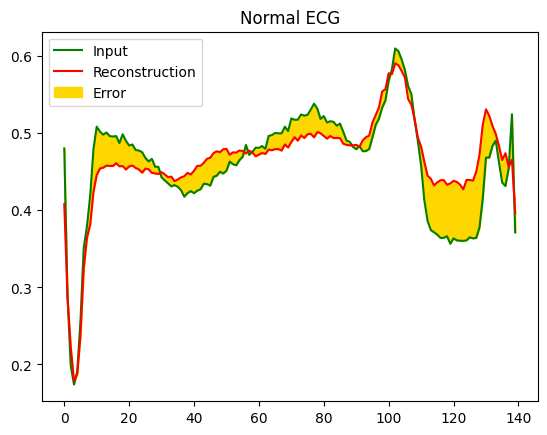

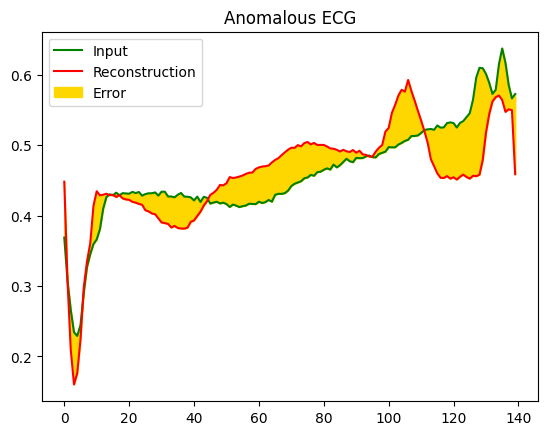

In [23]:
# normal ECG
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], color='green')
plt.plot(decoded_data[0], color='red')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='gold')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title("Normal ECG")
plt.show()


# Anomalous ECG
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], color='green')
plt.plot(decoded_data[0], color='red')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='gold')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title("Anomalous ECG")
plt.show()

In [28]:
def calculate_threshold(normal_train_data):

    norm_reconstructions = autoencoder.predict(normal_train_data)
    train_loss = tf.keras.losses.mae(norm_reconstructions, normal_train_data)

    threshold = np.mean(train_loss) + np.std(train_loss)
    return threshold,train_loss

def classify_anomaly(anomalous_test_data,threshold,train_loss):

    anom_reconstructions = autoencoder.predict(anomalous_test_data)
    test_loss = tf.keras.losses.mae(anom_reconstructions, anomalous_test_data)
    test_loss = np.mean(test_loss) + np.std(test_loss)

    if test_loss > threshold:
        return 1,test_loss
    else:
        return 0,test_loss

thresh,train_loss = calculate_threshold(normal_train_data)
print("Threshold is: ",thresh)

prediction,test_loss = classify_anomaly(anomalous_test_data,thresh,train_loss)
print("Prediction: ",prediction)

if prediction == 1:
    print("Anomaly detected")
else:
    print("No anomaly detected")

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold is:  0.02542738419399242
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Prediction:  1
Anomaly detected
